In [75]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [76]:
def load_data(fname):
    with open(fname, "rb") as f:
        return pkl.load(f)

In [77]:
def get_val_accs(data, iterations=15):
    val_accs = []
    for seed_data in data:

        iteration_val_accs = []
        for i in range(iterations):
            iteration_data = seed_data[i]
            iteration_val_acc = iteration_data['train']["val_acc"]
            iteration_val_accs.append(iteration_val_acc)
        val_accs.append(iteration_val_accs)
    return np.array(val_accs)


In [78]:
cka_data = load_data("_in-784_hd-512-512_out-10_dr-0.5_strategy-iterative_type-cka.pkl")
cka_val_accs = get_val_accs(cka_data)

l1_data = load_data("_in-784_hd-512-512_out-10_dr-0.5_strategy-iterative_type-l1.pkl")
l1_val_accs = get_val_accs(l1_data)

In [79]:
mean_cka_val_acc = cka_val_accs.mean(axis=0)
mean_l1_val_acc = l1_val_accs.mean(axis=0)

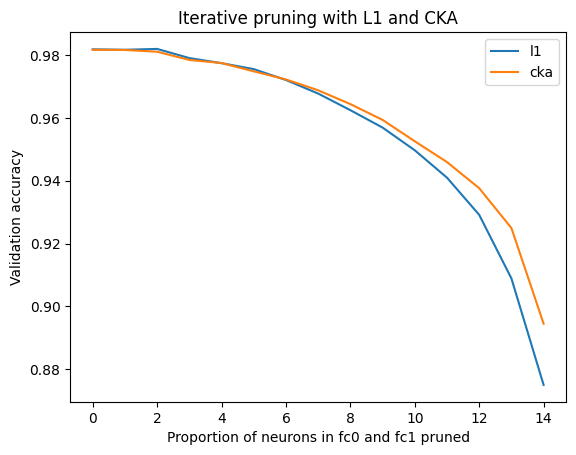

In [80]:
x = list(range(15))
plt.plot(x, mean_l1_val_acc, label='l1')
plt.plot(x, mean_cka_val_acc, label='cka')
plt.title("Iterative pruning with L1 and CKA")
plt.xlabel("Proportion of neurons in fc0 and fc1 pruned")
plt.ylabel("Validation accuracy")

plt.legend()
plt.show()